In [1]:
import pandas as pd
file = pd.read_csv('train.csv')
file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
new_file = file[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
new_file.groupby(['Sex']).agg({'Age':'mean'})

,Age
Sex,
female,27.915709
male,30.726645


In [3]:
new_file.groupby(['Survived', 'Sex']).agg({'Age':'mean'})

Age
Survived Sex              
0        female  25.046875
         male    31.618056
1        female  28.847716
         male    27.276022

In [4]:
new_file.groupby(['Embarked', 'Sex']).agg({'Age':'mean'})

Age
Embarked Sex              
C        female  28.344262
         male    32.998841
Q        female  24.291667
         male    30.937500
S        female  27.771505
         male    30.291440

In [5]:
new_file.groupby(['Embarked', 'Sex']).agg({'Age':'mean'}).sort_values(['Age', 'Sex'])

,,Age
Embarked,Sex,
Q,female,24.291667
S,female,27.771505
C,female,28.344262
S,male,30.291440
Q,male,30.937500
C,male,32.998841


In [6]:
new_file['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [13]:
# Введя номер билета - проверяем удачный он или нет
a = [int(i) for i in input(new_file['Ticket'])]
if sum(a[:3]) == sum(a[3:]):
    print('lucky ')
else:
    print('unlucky')

lucky 


In [19]:
import plotly.express as px


fig = px.bar(new_file, x='Sex', y='Survived', color='Sex')
fig.show()

In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


data_new_file = pd.read_csv('train.csv')
data_new_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
data_new_file.Age.value_counts(normalize=True).mul(100).round(2)


24.00    4.20
22.00    3.78
18.00    3.64
19.00    3.50
28.00    3.50
         ... 
36.50    0.14
55.50    0.14
0.92     0.14
23.50    0.14
74.00    0.14
Name: Age, Length: 88, dtype: float64

<AxesSubplot: >

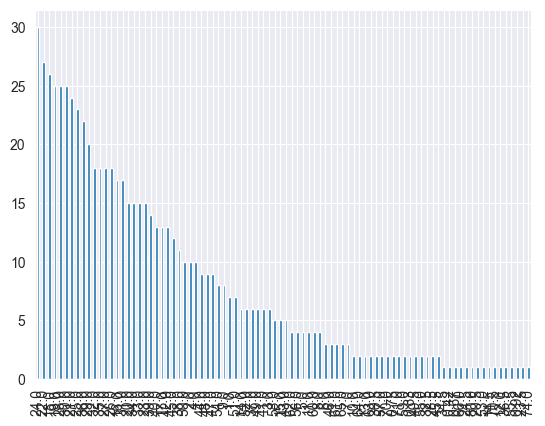

In [53]:
data_new_file.Age.value_counts().plot.bar()

<AxesSubplot: xlabel='Sex', ylabel='count'>

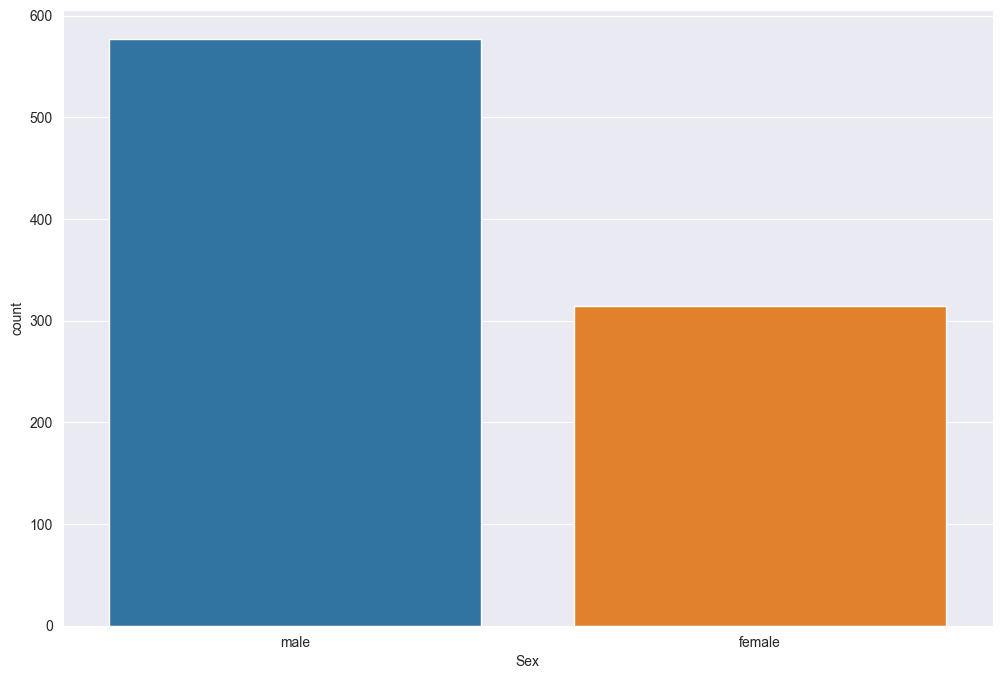

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(data_new_file['Age'],x=data_new_file.Sex)

C:\Users\sivvi\AppData\Local\Temp\ipykernel_2688\488855437.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

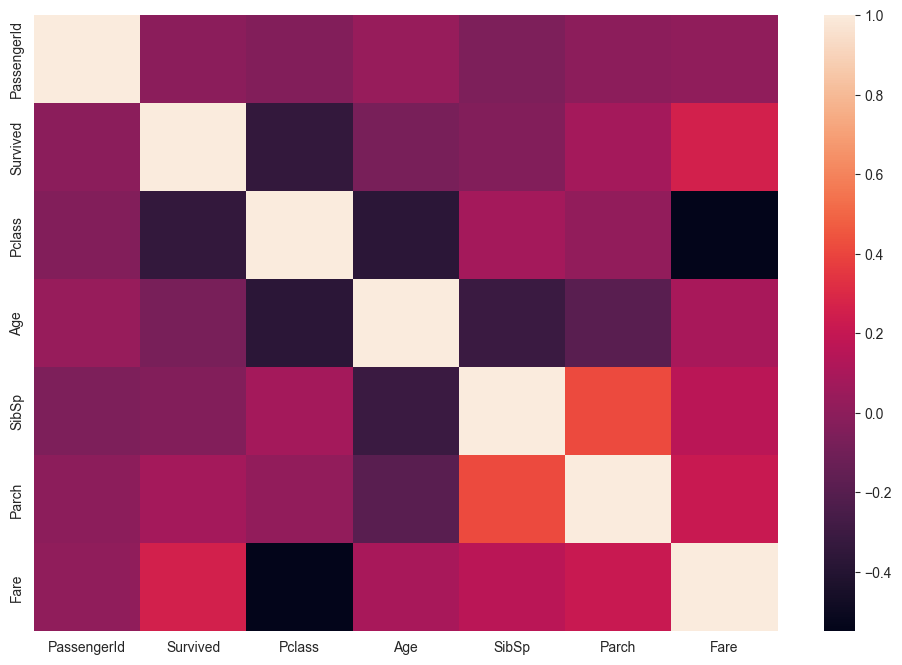

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(data_new_file.corr())